<a href="https://colab.research.google.com/github/vlastimiltetour/ecom_sales_eda/blob/main/Ecommerce_Sales_EDA_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
#import the json file
import pandas as pd
from google.colab import drive

drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [63]:
#converting json orders to dataframe
import pandas as pd
from google.colab import drive

filename = '/content/drive/MyDrive/order_data_10_9.json'
# Load JSON data into a DataFrame
raw_df = pd.read_json(filename)



#Fields is the name of the column which contains all the values
df_flattened = pd.json_normalize(raw_df['fields'])

# Concatenate the original 'model' and 'pk' columns with the flattened 'fields' columns
order_df = pd.concat([raw_df[['model', 'pk']], df_flattened], axis=1)

# Display the final DataFrame
#df_final
order_df



,model,pk,etb_id,first_name,last_name,birthday,email,number,comments,created,...,zpusob_vyroby,velikost,kalhotky_velikost_set,podprsenka_velikost_set,pas_velikost_set,poznamka,slevovy_kod,hodnota_kuponu,certificate_from,certificate_to
0,orders.order,103,23111426,Michaela,Křečková,None,vojnarova.michaela1@hmail.com,+420721203099,,2023-11-14T12:15:27.941Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,orders.order,107,23111430,Eliška,Pavelčíková,None,eliskapavelcikova@seznam.cz,605907272,Prosím o spojení s mou poslední objednávkou př...,2023-11-14T15:54:24.246Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,orders.order,109,23111432,Mirek,Březina,None,mirekbrezina16@gmail.com,721989640,,2023-11-14T17:11:33.776Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,orders.order,116,23111500,Barbora,Bečková,None,812baruska@gmail.com,733201388,,2023-11-15T10:35:13.885Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,orders.order,117,23111600,Ondrej,Vacho,None,ondrej262bm@gmail.com,+421905862013,,2023-11-16T20:24:38.442Z,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,orders.orderitem,1236,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Skladem,S,,,,​,-,-,​,​
638,orders.orderitem,1237,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Skladem,75D,,,,​,-,-,​,​
639,orders.orderitem,1240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Skladem,75E,,,,​,-,-,​,​
640,orders.orderitem,1241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Skladem,M,,,,​,-,-,​,​


In [64]:
#figure out basic information
order_df.info() #or order_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   model                    642 non-null    object 
 1   pk                       642 non-null    int64  
 2   etb_id                   232 non-null    object 
 3   first_name               232 non-null    object 
 4   last_name                232 non-null    object 
 5   birthday                 184 non-null    object 
 6   email                    232 non-null    object 
 7   number                   232 non-null    object 
 8   comments                 232 non-null    object 
 9   created                  232 non-null    object 
 10  updated                  232 non-null    object 
 11  country                  232 non-null    object 
 12  shipping                 232 non-null    object 
 13  shipping_price           232 non-null    object 
 14  address                  2

In [65]:
column_names = order_df.columns.to_list()
column_names

['model',
 'pk',
 'etb_id',
 'first_name',
 'last_name',
 'birthday',
 'email',
 'number',
 'comments',
 'created',
 'updated',
 'country',
 'shipping',
 'shipping_price',
 'address',
 'city',
 'zipcode',
 'vendor_id',
 'discount',
 'total_cost',
 'stripe_id',
 'zasilkovna_id',
 'paid',
 'shipped',
 'newsletter_consent',
 'author_comment',
 'discount_code',
 'coupon_id',
 'label',
 'confirmation_sent',
 'shipped_sent',
 'order',
 'product',
 'price',
 'total_price',
 'surcharge',
 'quantity',
 'zpusob_vyroby',
 'velikost',
 'kalhotky_velikost_set',
 'podprsenka_velikost_set',
 'pas_velikost_set',
 'poznamka',
 'slevovy_kod',
 'hodnota_kuponu',
 'certificate_from',
 'certificate_to']

In [66]:
#reduce the columns
corrected_order_df = order_df[[
 'etb_id',
 'birthday',
 'created',
 'updated',
 'country',
 'shipping',
 'shipping_price',
 'city',
 'total_cost',
 'paid',
 'shipped',
 'newsletter_consent',
 'order',
 'product',
 'price',
 'total_price',
 'quantity',
 'zpusob_vyroby',
 ]]

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


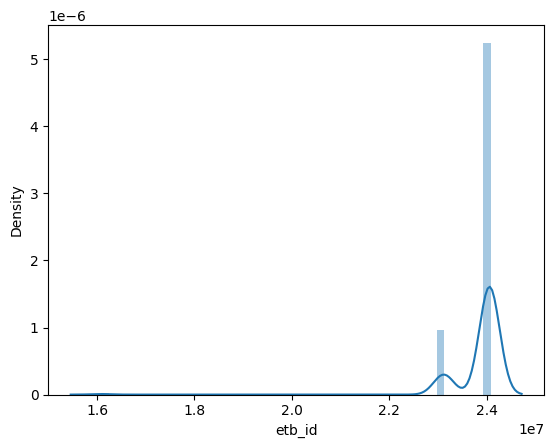

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


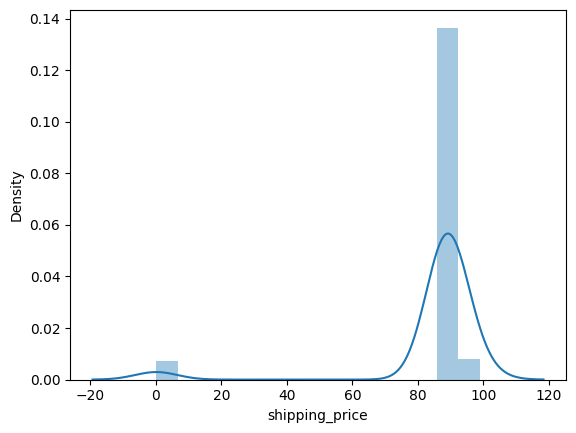

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


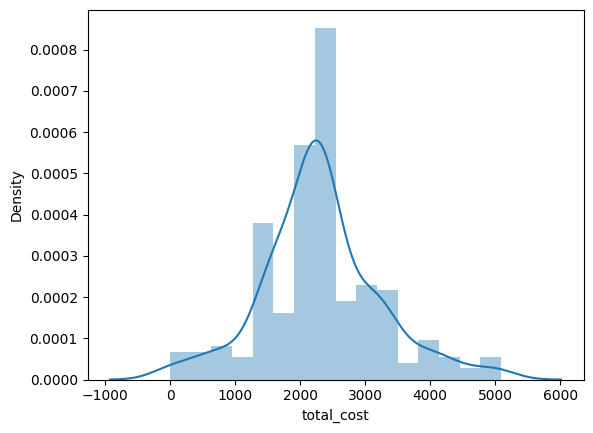

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


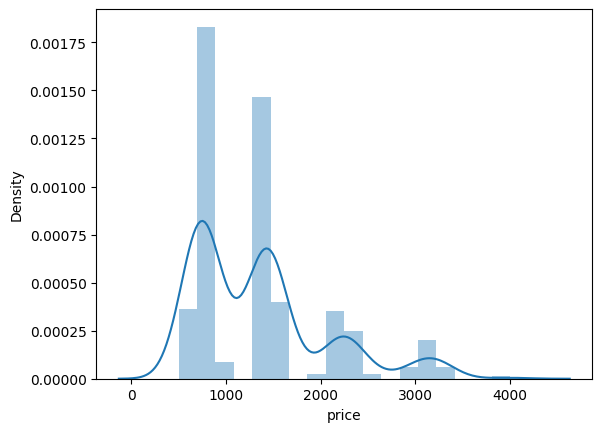

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


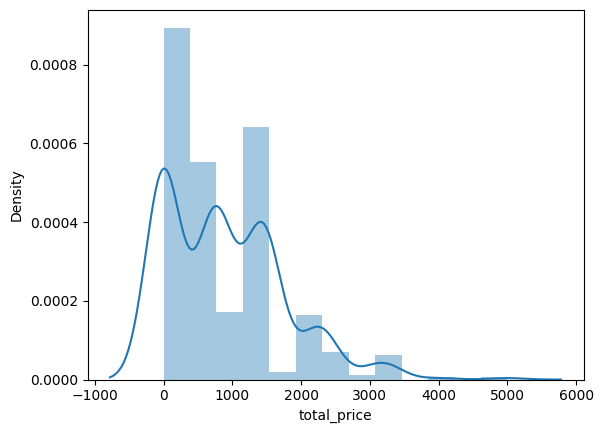

<ipython-input-67-a0c4f927b2b0>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
<ipython-input-67-a0c4f927b2b0>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(corrected_order_df[col], kde=True)


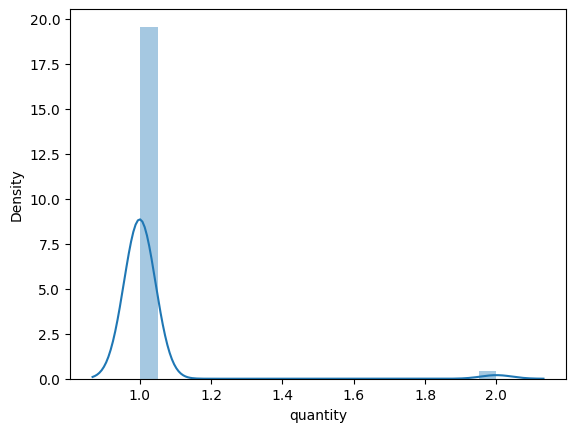

In [67]:
#correct the datatypes
numeric_columns = corrected_order_df[[
 'etb_id',
 'shipping_price',
 'total_cost',
 'price',
 'total_price',
 'quantity',
 ]]

for col in numeric_columns:
  corrected_order_df[col] = pd.to_numeric(corrected_order_df[col], errors='coerce')
  sns.distplot(corrected_order_df[col], kde=True)
  plt.show()


In [68]:
categorical_columns = corrected_order_df[[
 'country',
 'shipping',
 'city',
 'paid',
 'shipped',
 'newsletter_consent',
 'order',
 'product',
 'zpusob_vyroby',
 ]]

for col in categorical_columns:
  corrected_order_df[col] = corrected_order_df[col].astype('category')



<ipython-input-68-bba9974309fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = corrected_order_df[col].astype('category')
<ipython-input-68-bba9974309fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = corrected_order_df[col].astype('category')
<ipython-input-68-bba9974309fb>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [69]:
#reduce the column names
dates_columns = corrected_order_df[[
 'birthday',
 'created',
 'updated',
 ]]


for col in dates_columns:
  corrected_order_df[col] = pd.to_datetime(corrected_order_df[col], errors='coerce')

<ipython-input-69-7a18551e899c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_datetime(corrected_order_df[col], errors='coerce')
<ipython-input-69-7a18551e899c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df[col] = pd.to_datetime(corrected_order_df[col], errors='coerce')
<ipython-input-69-7a18551e899c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [70]:
#re-check the types after cleaning
corrected_order_df.dtypes

,0
etb_id,float64
birthday,datetime64[ns]
created,"datetime64[ns, UTC]"
updated,"datetime64[ns, UTC]"
country,category
shipping,category
shipping_price,float64
city,category
total_cost,float64
paid,category


In [71]:
corrected_order_df.describe(include='all')

,etb_id,birthday,created,updated,country,shipping,shipping_price,city,total_cost,paid,shipped,newsletter_consent,order,product,price,total_price,quantity,zpusob_vyroby
count,2.320000e+02,184,231,232,232,232,232.000000,223,232.000000,232,232,232,410.0,410.0,410.000000,410.000000,410.000000,410
unique,NaN,NaN,NaN,NaN,7,3,NaN,10,NaN,2,2,2,224.0,113.0,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,cz,Z,NaN,,NaN,True,True,False,1005.0,205.0,NaN,NaN,NaN,Skladem
freq,NaN,NaN,NaN,NaN,199,218,NaN,213,NaN,224,223,120,5.0,11.0,NaN,NaN,NaN,311
mean,2.387458e+07,1996-11-01 03:39:07.826086912,2024-04-30 17:27:34.141449984+00:00,2024-05-10 08:09:36.026801664+00:00,NaN,NaN,85.301724,NaN,2312.362931,NaN,NaN,NaN,NaN,NaN,1348.024390,894.780488,1.021951,NaN
min,1.608240e+07,1973-12-13 00:00:00,2023-11-14 12:15:27.941000+00:00,2023-12-11 13:49:50.695000+00:00,NaN,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,500.000000,0.000000,1.000000,NaN
25%,2.402240e+07,1992-10-04 06:00:00,2024-02-29 00:17:06.912999936+00:00,2024-03-06 16:58:04.594500096+00:00,NaN,NaN,89.000000,NaN,1653.590000,NaN,NaN,NaN,NaN,NaN,740.000000,0.000000,1.000000,NaN
50%,2.405271e+07,1996-07-24 00:00:00,2024-05-27 16:42:01.380999936+00:00,2024-06-06 14:11:55.462500096+00:00,NaN,NaN,89.000000,NaN,2279.000000,NaN,NaN,NaN,NaN,NaN,1350.000000,740.000000,1.000000,NaN
75%,2.407090e+07,2001-02-25 18:00:00,2024-07-10 03:17:54.801500160+00:00,2024-07-12 08:37:41.884499968+00:00,NaN,NaN,89.000000,NaN,2695.250000,NaN,NaN,NaN,NaN,NaN,1500.000000,1450.000000,1.000000,NaN
max,2.409080e+07,2024-10-03 00:00:00,2024-09-08 13:37:53.388000+00:00,2024-09-09 09:33:53.797000+00:00,NaN,NaN,99.000000,NaN,5089.000000,NaN,NaN,NaN,NaN,NaN,4000.000000,5000.000000,2.000000,NaN


In [72]:
corrected_order_df

,etb_id,birthday,created,updated,country,shipping,shipping_price,city,total_cost,paid,shipped,newsletter_consent,order,product,price,total_price,quantity,zpusob_vyroby
0,23111426.0,NaT,2023-11-14 12:15:27.941000+00:00,2023-12-12 20:55:52.548000+00:00,cz,Z,89.0,,3229.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
1,23111430.0,NaT,2023-11-14 15:54:24.246000+00:00,2023-12-12 21:00:43.993000+00:00,None,Z,0.0,,2430.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
2,23111432.0,NaT,2023-11-14 17:11:33.776000+00:00,2023-12-12 21:00:51.392000+00:00,cz,Z,89.0,,779.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
3,23111500.0,NaT,2023-11-15 10:35:13.885000+00:00,2023-12-12 21:00:58.268000+00:00,cz,Z,89.0,,2229.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
4,23111600.0,NaT,2023-11-16 20:24:38.442000+00:00,2023-12-12 21:01:03.405000+00:00,sk,Z,99.0,,1579.0,True,True,False,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,102.0,740.0,740.0,1.0,Skladem
638,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1017.0,101.0,1400.0,1400.0,1.0,Skladem
639,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020.0,225.0,1500.0,1500.0,1.0,Skladem
640,NaN,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1020.0,226.0,1060.0,1060.0,1.0,Skladem


In [73]:
corrected_order_df.shape

(642, 18)

<ipython-input-74-4201093376b7>:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  corrected_order_df['month'] = corrected_order_df['created'].dt.to_period('M')
<ipython-input-74-4201093376b7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corrected_order_df['month'] = corrected_order_df['created'].dt.to_period('M')


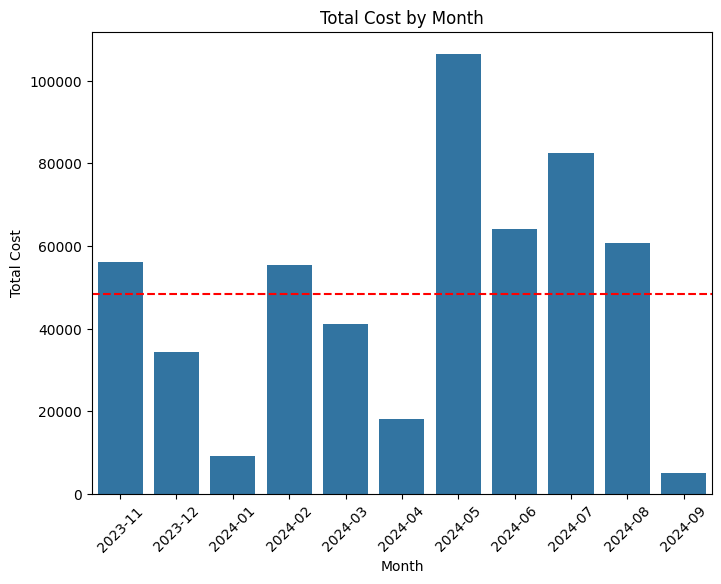

In [74]:
#Group by month and calculate the total cost by month
corrected_order_df.sort_values(by=['created'])
corrected_order_df['month'] = corrected_order_df['created'].dt.to_period('M')

monthly_cost = corrected_order_df.groupby('month')['total_cost'].sum().reset_index()
average_cost = monthly_cost['total_cost'].mean()


plt.figure(figsize=(8, 6))
sns.barplot(x='month', y='total_cost', data=monthly_cost)
plt.title('Total Cost by Month')
plt.xlabel('Month')
plt.ylabel('Total Cost')
plt.xticks(rotation=45)
plt.axhline(average_cost, color='red', linestyle='--', label=f'Average Cost: {average_cost:.2f}')

plt.show()